<a href="https://colab.research.google.com/github/ThangDoan2001/TensorFlow_ZeroToHero/blob/master/03_introduction_to_commputer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Net works and Computer Vision with TensoFlow

Computer vision is the practive of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front. 

## Get the data
The images we're working with are form the Food1-1 dataset(101 different classes of food)

However we've modified it to only use two classes(pizza and steak)

**Note:** We start with a smaller datatset so we can experiment quickly and figure what works or better yet what doesn't work before scaling up. 

In [10]:
import zipfile


In [11]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file 
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2021-08-18 10:23:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 209.85.200.128, 74.125.129.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   116MB/s    in 0.9s    

2021-08-18 10:23:59 (116 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data

And for a computer vision project.... It usually means visualizing many samples of your data

In [12]:
!ls pizza_steak

test  train


In [13]:
!ls pizza_steak/train

pizza  steak


In [14]:
import os 

# Walk through puiizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [15]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug 18 10:23 .
drwxr-xr-x 1 root root 4096 Aug 18 10:23 ..
-rw-r--r-- 1 root root 6148 Aug 18 10:23 .DS_Store
drwxr-xr-x 4 root root 4096 Aug 18 10:23 test
drwxr-xr-x 4 root root 4096 Aug 18 10:23 train


In [16]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [17]:
# get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectory
class_names = class_names[1:] # Remove .DS_store
print(class_names)

['pizza' 'steak']


In [18]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class): 
  # Set up the target directory(we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['596494.jpg']
Image shape: (512, 512, 3)


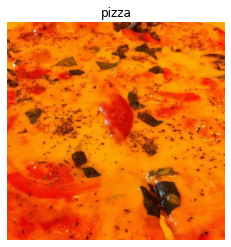

In [19]:
# View a random image from the trainig dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [20]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[250, 170,  13],
        [246, 166,   9],
        [245, 165,   8],
        ...,
        [246, 168,   8],
        [243, 167,   6],
        [245, 169,   8]],

       [[251, 171,  14],
        [246, 166,   9],
        [246, 163,   7],
        ...,
        [247, 167,   8],
        [242, 164,   4],
        [243, 165,   5]],

       [[253, 170,  12],
        [248, 165,   9],
        [246, 163,   7],
        ...,
        [244, 162,   1],
        [247, 165,   4],
        [254, 172,  11]],

       ...,

       [[248,  85,  10],
        [244,  81,   6],
        [246,  83,   6],
        ...,
        [246, 102,   6],
        [249, 105,   9],
        [250, 107,  11]],

       [[245,  82,   7],
        [247,  84,   9],
        [244,  81,   6],
        ...,
        [241, 103,   4],
        [241, 103,   4],
        [245, 107,   6]],

       [[250,  86,  14],
        [254,  91,  16],
        [246,  83,   8],
        ...,
        [243, 107,   

In [21]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

**Note:** As we've discuessed beffore , many machine learning models, including neural networks prefer the values they work with to be between 0 & 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).


In [22]:
# get all the pixel values between 0 & 1
img/255.

array([[[0.98039216, 0.66666667, 0.05098039],
        [0.96470588, 0.65098039, 0.03529412],
        [0.96078431, 0.64705882, 0.03137255],
        ...,
        [0.96470588, 0.65882353, 0.03137255],
        [0.95294118, 0.65490196, 0.02352941],
        [0.96078431, 0.6627451 , 0.03137255]],

       [[0.98431373, 0.67058824, 0.05490196],
        [0.96470588, 0.65098039, 0.03529412],
        [0.96470588, 0.63921569, 0.02745098],
        ...,
        [0.96862745, 0.65490196, 0.03137255],
        [0.94901961, 0.64313725, 0.01568627],
        [0.95294118, 0.64705882, 0.01960784]],

       [[0.99215686, 0.66666667, 0.04705882],
        [0.97254902, 0.64705882, 0.03529412],
        [0.96470588, 0.63921569, 0.02745098],
        ...,
        [0.95686275, 0.63529412, 0.00392157],
        [0.96862745, 0.64705882, 0.01568627],
        [0.99607843, 0.6745098 , 0.04313725]],

       ...,

       [[0.97254902, 0.33333333, 0.03921569],
        [0.95686275, 0.31764706, 0.02352941],
        [0.96470588, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to ur training data

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data ( get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Build a CNN model(same as the Tiny VGG on the CNN explainer website)

In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, 
                         activation=tf.keras.activations.relu,
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 42s 210ms/step - loss: 0.5198 - accuracy: 0.7380 - val_loss: 0.3857 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4150 - accuracy: 0.8253 - val_loss: 0.3306 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3911 - accuracy: 0.8313 - val_loss: 0.3525 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3646 - accuracy: 0.8380 - val_loss: 0.3239 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3243 - accuracy: 0.8673 - val_loss: 0.3083 - val_accuracy: 0.8740


**Note:** If the above cell is taking longer than ~ 10 seconds per epoch, make sure you're using a GPU by going to 

Runtime -> Change Runtime Type -> Hardware Accelator  -> GPU(you may have to rerun some sells above)


In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# poloclub.github.io/cnn-explainer

## Using the same model as before

Let's replicate the model we've build in a previous section to see if it works with our imaghe data.

The model we're building is from the TensorFlow playground:

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6927 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


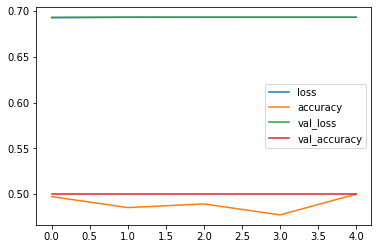

In [ ]:
import pandas as pd
pd.DataFrame(history_2.history).plot()

In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN, model_2 performs terribly... let's try to improve

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model(same as above but let's step it up a notch)
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        steps_per_epoch=len(train_data),
                        epochs=5,
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 2.8814 - accuracy: 0.6280 - val_loss: 0.7632 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.8753 - accuracy: 0.7233 - val_loss: 0.6497 - val_accuracy: 0.7100
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6860 - accuracy: 0.7300 - val_loss: 0.5038 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.7257 - accuracy: 0.7467 - val_loss: 0.5925 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.5637 - accuracy: 0.7680 - val_loss: 0.5896 - val_accuracy: 0.7260


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)

2. Preprocess the data (prepared it for our model, the main step here was scaling/ normalizing)

3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline) 
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['510757.jpg']
Image shape: (512, 512, 3)
['3860002.jpg']
Image shape: (512, 512, 3)


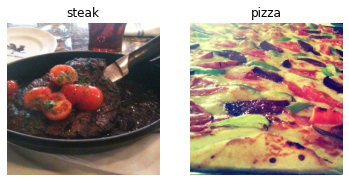

In [28]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [29]:
# Define directory data paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~ 10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying t olearn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health....

In [30]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [32]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # Size of minibatches to laod data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [35]:
# Get a sample of a train data batch 
images, labels = train_data.next() # get the "next " batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [36]:
# How many batches are there?
len(train_data)

47

In [37]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.00392157, 0.01176471, 0.        ],
          [0.00392157, 0.01176471, 0.        ],
          [0.00392157, 0.01176471, 0.        ],
          ...,
          [0.20784315, 0.12941177, 0.1254902 ],
          [0.20000002, 0.12156864, 0.11764707],
          [0.20392159, 0.1254902 , 0.12156864]],
 
         [[0.00392157, 0.01176471, 0.        ],
          [0.00392157, 0.01176471, 0.        ],
          [0.00392157, 0.01176471, 0.        ],
          ...,
          [0.21176472, 0.13725491, 0.12156864],
          [0.20784315, 0.12941177, 0.1254902 ],
          [0.20392159, 0.1254902 , 0.12156864]],
 
         [[0.00392157, 0.01176471, 0.        ],
          [0.00392157, 0.01176471, 0.        ],
          [0.00392157, 0.01176471, 0.        ],
          ...,
          [0.21176472, 0.13725491, 0.12156864],
          [0.21176472, 0.13725491, 0.12156864],
          [0.20392159, 0.12941177, 0.1137255 ]],
 
         ...,
 
         [[0.05882353, 0.04313726, 0.03921569],
          [0.05882

In [38]:
# View the first batch of labels
labels

array([0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup
when beginning a machine learning experiment and then as you keep experimenting,
you try to beat the baseline

**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field of you problem)

In [39]:
# Make the creatin of our model a lirttel easier 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras import Sequential


In [42]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=3, # the size of the sliding window going across an input 
         strides=1, # the size of the step the sliding window takes across an input
         padding="valid", # if "same" output shape is same as input shape, if "valid", output shape gets compressed 
         activation="relu",
         input_shape=(224, 224, 3)), # Input layer (Specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Dense(1, activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])